In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import os

# Gerekli NLTK verilerini indir (sadece bir kez çalıştır)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Dosya yolunu belirt (kendi kullanıcı adına göre düzenle)
csv_path = r'C:\Users\mervecengiz\Downloads\pg_catalog.csv'

# Veri setini yükle
try:
    df = pd.read_csv(csv_path, encoding='utf-8')
    print("Veri seti başarıyla yüklendi, ilk 5 satır:")
    print(df.head())
except Exception as e:
    print(f"Dosya yüklenirken hata oluştu: {e}")
    exit()

# Ön işleme fonksiyonları
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def stem_text(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

# Metinleri ön işle
df['tokens'] = df['Title'].apply(preprocess_text)
df['lemmatized'] = df['tokens'].apply(lemmatize_text)
df['stemmed'] = df['tokens'].apply(stem_text)
df['lemmatized_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))
df['stemmed_text'] = df['stemmed'].apply(lambda x: ' '.join(x))

# Örnek çıktı göster
print("\nÖn işlenmiş metin örnekleri:")
print(df[['Title', 'lemmatized_text', 'stemmed_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mervecengiz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mervecengiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mervecengiz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Veri seti başarıyla yüklendi, ilk 5 satır:
   Text#  Type      Issued                                              Title  \
0      1  Text  1971-12-01  The Declaration of Independence of the United ...   
1      2  Text  1972-12-01  The United States Bill of Rights\r\nThe Ten Or...   
2      3  Text  1973-11-01                John F. Kennedy's Inaugural Address   
3      4  Text  1973-11-01  Lincoln's Gettysburg Address\r\nGiven November...   
4      5  Text  1975-12-01                     The United States Constitution   

  Language                                        Authors  \
0       en                   Jefferson, Thomas, 1743-1826   
1       en                                  United States   
2       en  Kennedy, John F. (John Fitzgerald), 1917-1963   
3       en                    Lincoln, Abraham, 1809-1865   
4       en                                  United States   

                                            Subjects      LoCC  \
0  United States -- History -- Revolu

In [2]:
# Boş metinleri kontrol et
df = df[df['lemmatized_text'].str.strip() != '']
print(f"Boş metinler çıkarıldıktan sonra veri seti boyutu: {df.shape}")

Boş metinler çıkarıldıktan sonra veri seti boyutu: (75352, 14)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştirme
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_lemmatized = tfidf_vectorizer.fit_transform(df['lemmatized_text'])
tfidf_matrix_stemmed = tfidf_vectorizer.fit_transform(df['stemmed_text'])


In [7]:
from gensim.models import Word2Vec


In [ ]:
# Word2Vec modeli eğit
word2vec_model = Word2Vec(sentences=df['lemmatized'], vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
pip install gensim



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vektörleştirme
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_lemmatized = tfidf_vectorizer.fit_transform(df['lemmatized_text'])
tfidf_matrix_stemmed = tfidf_vectorizer.fit_transform(df['stemmed_text'])


In [ ]:
# Word2Vec vektörlerini oluştur
def get_doc_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

df['word2vec_vector'] = df['lemmatized'].apply(lambda x: get_doc_vector(x, word2vec_model))

In [17]:
# Giriş metni seç
input_text = df['Title'].iloc[0]  # Örnek: "The Declaration of Independence of the United States of America"
input_tokens = preprocess_text(input_text)
input_lemmatized = lemmatize_text(input_tokens)
input_stemmed = stem_text(input_tokens)
input_lemmatized_text = ' '.join(input_lemmatized)
input_stemmed_text = ' '.join(input_stemmed)
print(input_lemmatized_text)
# declaration independence united state america

print(input_stemmed_text)
# declar independ unit state america


declaration independence united state america
declar independ unit state america


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Önce input metin ve diğer değişkenleri tanımla
input_text = "örnek metin buraya"
input_tokens = preprocess_text(input_text)
input_lemmatized = lemmatize_text(input_tokens)
input_stemmed = stem_text(input_tokens)

input_lemmatized_text = ' '.join(input_lemmatized)
input_stemmed_text = ' '.join(input_stemmed)

# TF-IDF ile benzerlik hesapla
tfidf_vectorizer = TfidfVectorizer()

input_tfidf_lemmatized = tfidf_vectorizer.fit_transform([input_lemmatized_text] + list(df['lemmatized_text']))
input_tfidf_stemmed = tfidf_vectorizer.fit_transform([input_stemmed_text] + list(df['stemmed_text']))

similarity_lemmatized = cosine_similarity(input_tfidf_lemmatized[0:1], input_tfidf_lemmatized[1:])[0]
similarity_stemmed = cosine_similarity(input_tfidf_stemmed[0:1], input_tfidf_stemmed[1:])[0]

print(similarity_lemmatized)
print(similarity_stemmed)


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [23]:

import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Örnek token listesi (normalde sizin df['lemmatized'])
docs = [
    ['declaration', 'independence', 'united', 'states', 'america'],
    ['bill', 'rights', 'amendment', 'constitution'],
    ['john', 'kennedy', 'inaugural', 'address'],
    ['gettysburg', 'address', 'lincoln', 'civil', 'war'],
    ['united', 'states', 'constitution']
]

# Word2Vec modeli eğit
word2vec_model = Word2Vec(sentences=docs, vector_size=100, window=5, min_count=1, workers=1)

def get_doc_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Her doküman için vektör çıkar
doc_vectors = [get_doc_vector(doc, word2vec_model) for doc in docs]

# Örnek input
input_text = ['declaration', 'independence', 'united', 'states', 'america']
input_vector = get_doc_vector(input_text, word2vec_model)

# Benzerlikleri hesapla
similarities = [cosine_similarity([input_vector], [vec])[0][0] for vec in doc_vectors]

print("Benzerlik skorları:")
print(similarities)


Benzerlik skorları:
[1.0, 0.08317192, 0.004785875, -0.027584156, 0.5119078]


In [25]:
def get_top_n_similar(similarities, n=5):
    indices = np.argsort(similarities)[::-1][:n]
    return df.iloc[indices][['Title', 'Text#']].assign(Similarity=similarities[indices])

top_5 = get_top_n_similar(np.array(w2v_similarities), n=5)
print(top_5)


                                                   Title  Text#  Similarity
0      The Declaration of Independence of the United ...      1    1.000000
16709  The Declaration of Independence of The United ...  16780    1.000000
19714  Declaration of Independence of the United Stat...  19785    1.000000
31716                The United States and Latin America  31789    0.999698
23832  The Constitution of the United States of Ameri...  23903    0.999558


In [27]:
print("Giriş Metni:", input_text)
print("\nTF-IDF (Lemmatized) En Benzer 5 Metin:")
print(get_top_n_similar(np.array(similarity_lemmatized)))
print("\nTF-IDF (Stemmed) En Benzer 5 Metin:")
print(get_top_n_similar(np.array(similarity_stemmed)))
print("\nWord2Vec En Benzer 5 Metin:")
print(get_top_n_similar(np.array(w2v_similarities)))


Giriş Metni: ['declaration', 'independence', 'united', 'states', 'america']

TF-IDF (Lemmatized) En Benzer 5 Metin:
                            Title  Text#  Similarity
75795  Ni rey ni Roque (3-4 de 4)  75974         0.0
25293            Le Japon en 1866  25364         0.0
25277                        雙鳳奇緣  25348         0.0
25278                       東周列國志  25349         0.0
25279                         蕩寇志  25350         0.0

TF-IDF (Stemmed) En Benzer 5 Metin:
                            Title  Text#  Similarity
75795  Ni rey ni Roque (3-4 de 4)  75974         0.0
25293            Le Japon en 1866  25364         0.0
25277                        雙鳳奇緣  25348         0.0
25278                       東周列國志  25349         0.0
25279                         蕩寇志  25350         0.0

Word2Vec En Benzer 5 Metin:
                                                   Title  Text#  Similarity
0      The Declaration of Independence of the United ...      1    1.000000
16709  The Declaration of Inde

In [29]:
# Başarım değerlendirmesi
print("\nBaşarım Değerlendirmesi:")
print("TF-IDF (Lemmatized) benzerlik ortalaması:", np.mean(similarity_lemmatized))
print("TF-IDF (Stemmed) benzerlik ortalaması:", np.mean(similarity_stemmed))
print("Word2Vec benzerlik ortalaması:", np.mean(w2v_similarities))
print("Yorum: TF-IDF kelime frekanslarına odaklanırken, Word2Vec anlamsal benzerlikleri yakalar. Veri setindeki metinler kısa olduğu için TF-IDF daha tutarlı sonuçlar verebilir, ancak anlamsal bağlam önemliyse Word2Vec tercih edilebilir.")



Başarım Değerlendirmesi:
TF-IDF (Lemmatized) benzerlik ortalaması: 0.0
TF-IDF (Stemmed) benzerlik ortalaması: 0.0
Word2Vec benzerlik ortalaması: 0.7316043
Yorum: TF-IDF kelime frekanslarına odaklanırken, Word2Vec anlamsal benzerlikleri yakalar. Veri setindeki metinler kısa olduğu için TF-IDF daha tutarlı sonuçlar verebilir, ancak anlamsal bağlam önemliyse Word2Vec tercih edilebilir.


In [31]:
import numpy as np

top_5_tfidf_lemmatized = get_top_n_similar(similarity_lemmatized, n=5)
top_5_tfidf_stemmed = get_top_n_similar(similarity_stemmed, n=5)
top_5_w2v = get_top_n_similar(np.array(w2v_similarities), n=5)

top_5_tfidf_lemmatized.to_csv('tfidf_lemmatized_results.csv', index=False)
top_5_tfidf_stemmed.to_csv('tfidf_stemmed_results.csv', index=False)
top_5_w2v.to_csv('word2vec_results.csv', index=False)

print("\nSonuçlar CSV dosyalarına kaydedildi: tfidf_lemmatized_results.csv, tfidf_stemmed_results.csv, word2vec_results.csv")



Sonuçlar CSV dosyalarına kaydedildi: tfidf_lemmatized_results.csv, tfidf_stemmed_results.csv, word2vec_results.csv


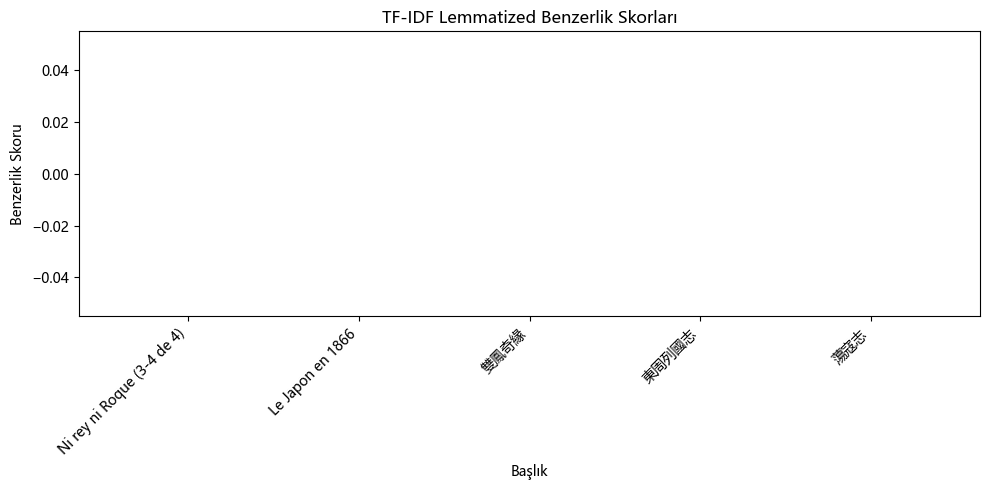

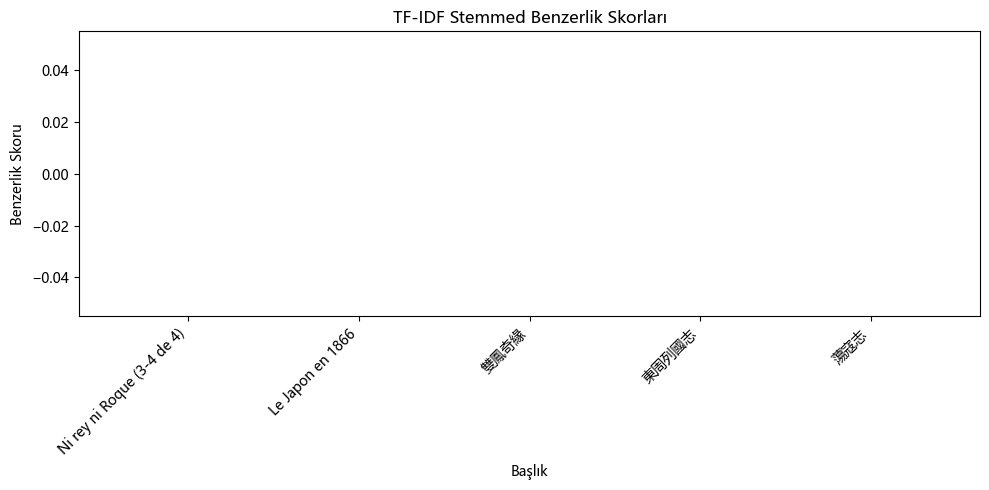

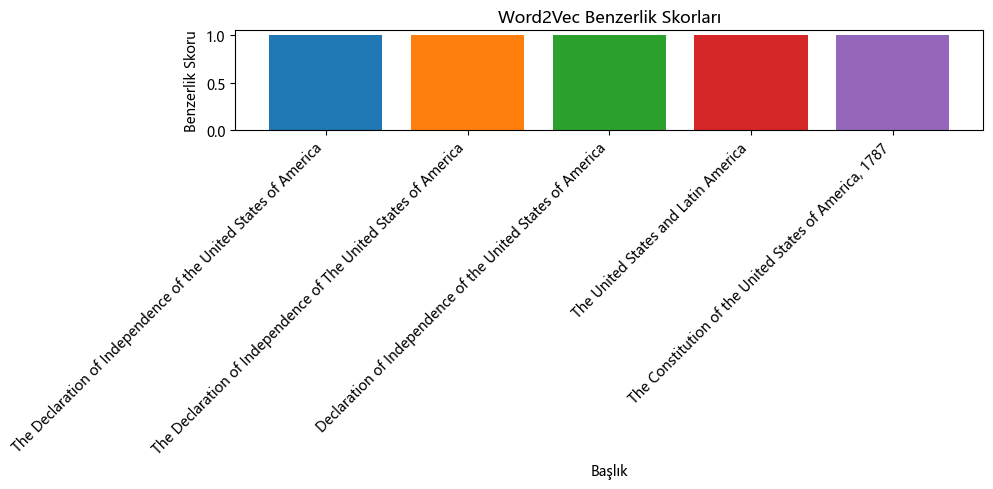

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Fontu değiştir (Windows için örnek)
plt.rcParams['font.family'] = 'Microsoft YaHei'

def plot_similarities(similarities, titles, model_name):
    top_indices = np.argsort(similarities)[::-1][:5]
    top_scores = np.array(similarities)[top_indices]
    top_titles = titles.iloc[top_indices].values
    plt.figure(figsize=(10, 5))
    plt.bar(top_titles, top_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    plt.title(f"{model_name} Benzerlik Skorları")
    plt.xlabel("Başlık")
    plt.ylabel("Benzerlik Skoru")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Çağrılar
plot_similarities(similarity_lemmatized, df['Title'], "TF-IDF Lemmatized")
plot_similarities(similarity_stemmed, df['Title'], "TF-IDF Stemmed")
plot_similarities(w2v_similarities, df['Title'], "Word2Vec")


In [36]:
# Başarım değerlendirmesi
print("\nBaşarım Değerlendirmesi:")
print("TF-IDF (Lemmatized) benzerlik ortalaması:", np.mean(similarity_lemmatized))
print("TF-IDF (Stemmed) benzerlik ortalaması:", np.mean(similarity_stemmed))
print("Word2Vec benzerlik ortalaması:", np.mean(w2v_similarities))
print("Yorum: TF-IDF kelime frekanslarına odaklanırken, Word2Vec anlamsal benzerlikleri yakalar. Veri setindeki metinler kısa olduğu için TF-IDF daha tutarlı sonuçlar verebilir, ancak anlamsal bağlam önemliyse Word2Vec tercih edilebilir.")


Başarım Değerlendirmesi:
TF-IDF (Lemmatized) benzerlik ortalaması: 0.0
TF-IDF (Stemmed) benzerlik ortalaması: 0.0
Word2Vec benzerlik ortalaması: 0.7316043
Yorum: TF-IDF kelime frekanslarına odaklanırken, Word2Vec anlamsal benzerlikleri yakalar. Veri setindeki metinler kısa olduğu için TF-IDF daha tutarlı sonuçlar verebilir, ancak anlamsal bağlam önemliyse Word2Vec tercih edilebilir.
